In [1]:
# Import the libraries needed for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Import the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Looking at the shape of the dataset
df.shape

(5110, 12)

In [4]:
# Looking into the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
# checking for duplicate entries in the data
df["id"].nunique()

5110

In [6]:
# counting the IDs
id_counts = df["id"].value_counts()
id_counts.head(15)

9046     1
22194    1
15104    1
28315    1
56996    1
52588    1
10243    1
5074     1
16010    1
63764    1
27916    1
21653    1
34257    1
38078    1
40167    1
Name: id, dtype: int64

In [7]:
id_counts.value_counts()

1    5110
Name: id, dtype: int64

In [8]:
# proportion of class balance 'stroke'
df['stroke'].value_counts(normalize = True) * 100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

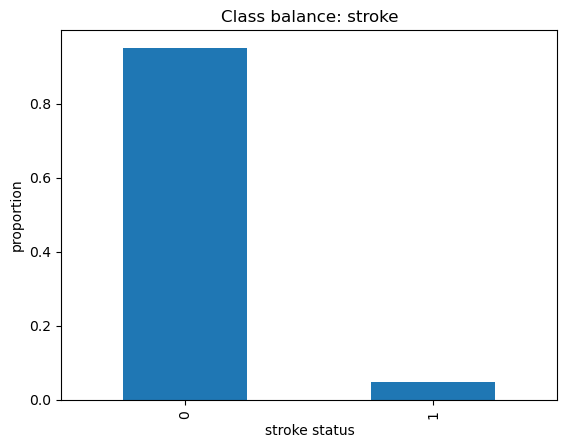

In [9]:
# Plot class balance ['stroke']
df['stroke'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel('stroke status')
plt.ylabel('proportion')
plt.title('Class balance: stroke');

In [10]:
# average stroke rate
mean = df['stroke'].mean()
print('The expected probability of stroke is:', mean)

The expected probability of stroke is: 0.0487279843444227


In [11]:
# Looking at gender proportion
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

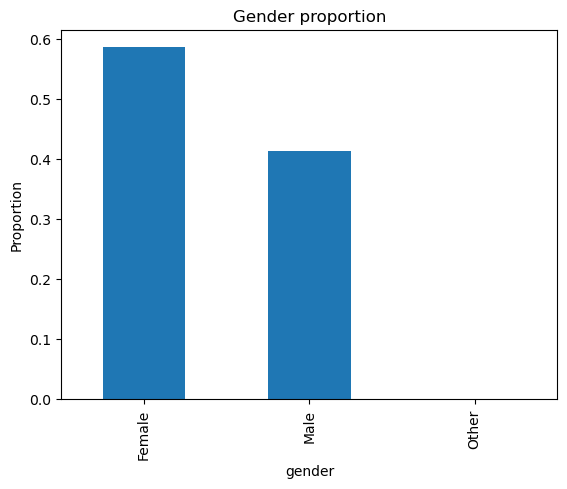

In [12]:
# Proportionally
gender_prop = df['gender'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("gender")
plt.ylabel('Proportion')
plt.title('Gender proportion');

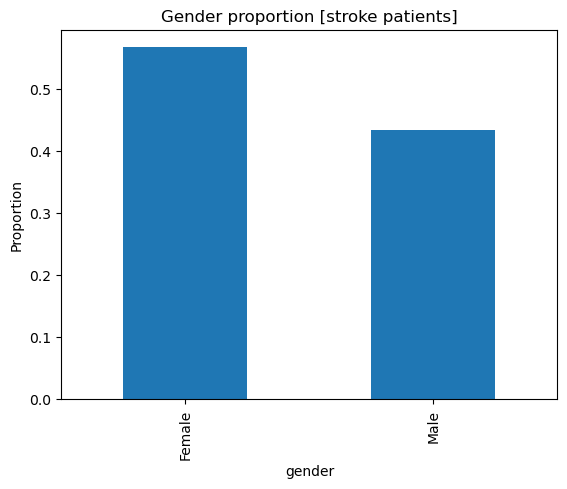

In [13]:
# Subseting the stroke 'yes' patients and looking into the gender distribution
df_y = df[df['stroke'] == 1]
df_y['gender'].value_counts(normalize = True).plot(kind = 'bar')
plt.xlabel("gender")
plt.ylabel('Proportion')
plt.title('Gender proportion [stroke patients]');

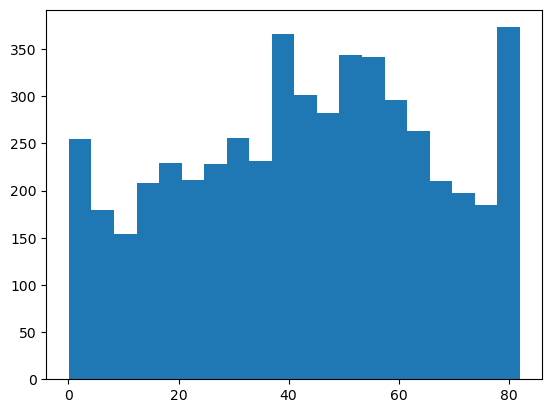

In [14]:
# Visualizing the age distribution
plt.hist(df['age'], bins = 20);

In [15]:
# Subsetting patients with 'yes' stroke status
df_yes = df[df['stroke'] == 1]
df_yes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [16]:
# Looking at the shape of the dataframe
df_yes.shape

(249, 12)

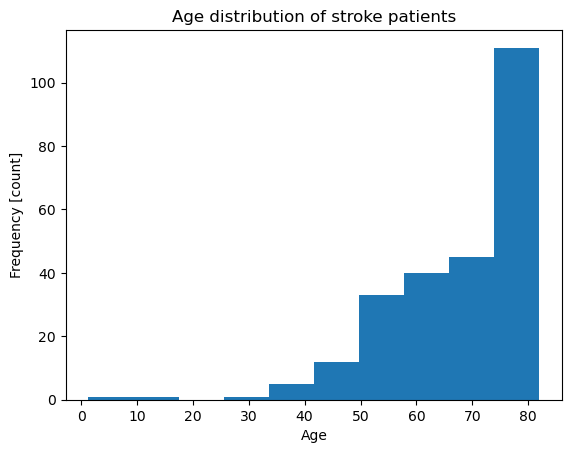

In [17]:
# Visualizing the age distribution of the stroke 'yes' patients
plt.hist(df_yes['age'])
plt.xlabel('Age')
plt.ylabel('Frequency [count]')
plt.title('Age distribution of stroke patients');

In [18]:
# Subsetting the patients with 'no' stroke status
df_no = df[df['stroke'] == 0]
df_no.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [19]:
# Looking at the shape of the dataframe
df_no.shape

(4861, 12)

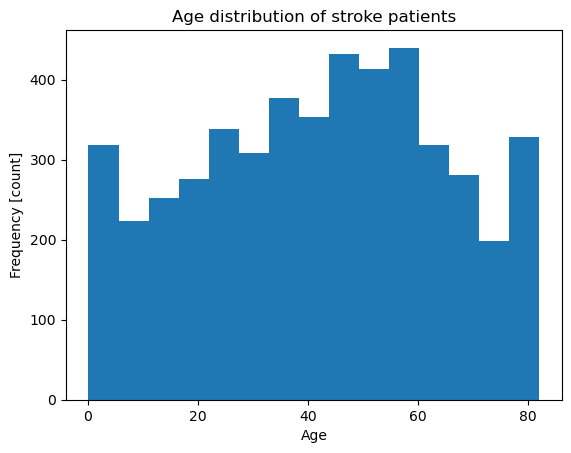

In [20]:
# Visualizing the age distribution of stroke 'no' patients
plt.hist(df_no['age'], bins = 15)
plt.xlabel('Age')
plt.ylabel('Frequency [count]')
plt.title('Age distribution of stroke patients');

In [21]:
correlation = df['age'].corr(df['stroke'])
correlation

0.2452573461709743

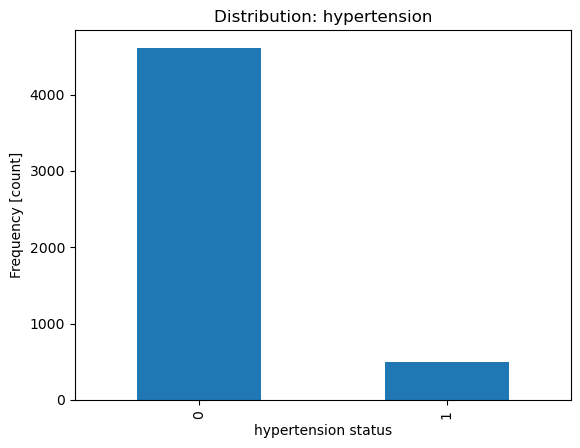

In [22]:
# Aggregating and visualizing the hypertension record
hypertension = df['hypertension'].value_counts().plot(kind = 'bar')
plt.xlabel('hypertension status')
plt.ylabel('Frequency [count]')
plt.title("Distribution: hypertension");

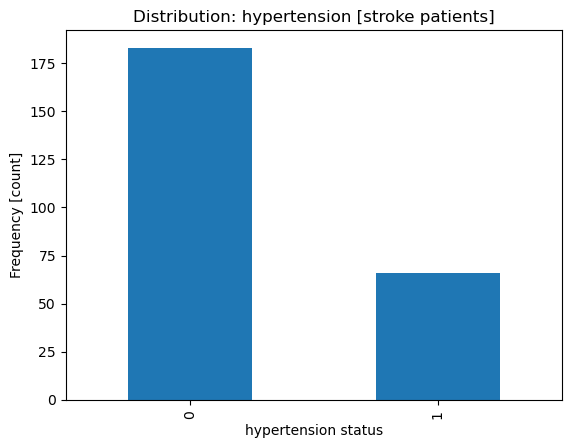

In [23]:
df_yes['hypertension'].value_counts().plot(kind = 'bar')
plt.xlabel('hypertension status')
plt.ylabel('Frequency [count]')
plt.title("Distribution: hypertension [stroke patients]");

In [24]:
df['hypertension'].corr(df['stroke'])

0.12790382346648

In [25]:
# Distribution of residence of patients
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

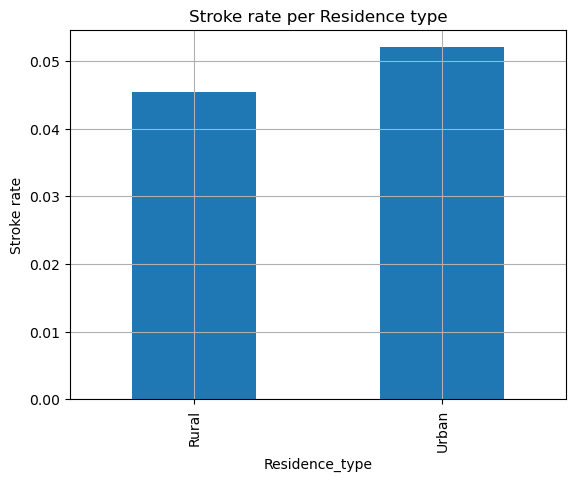

In [26]:
# aggregate 'Residence_type' with 'stroke'
df.groupby("Residence_type").aggregate({"stroke": "mean"}).plot(kind = 'bar', legend = None)
# label the axis and title
plt.ylabel('Stroke rate')
plt.title('Stroke rate per Residence type')
plt.grid()

In [27]:
# Calculating the correlation
df['avg_glucose_level'].corr(df['stroke'])

0.13194544082571

In [28]:
# Calculating the correlation
df['bmi'].corr(df['stroke'])

0.042373661149233646

In [29]:
# Looking at the distribution
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

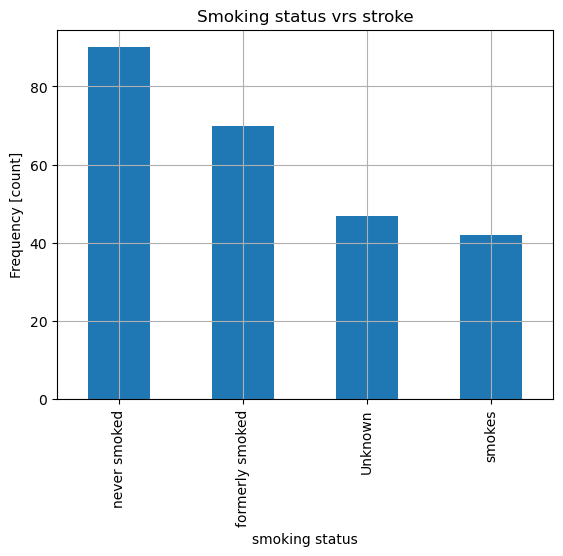

In [30]:
df_yes['smoking_status'].value_counts().plot(kind = 'bar')
plt.xlabel('smoking status')
plt.ylabel('Frequency [count]')
plt.title('Smoking status vrs stroke')
plt.grid();

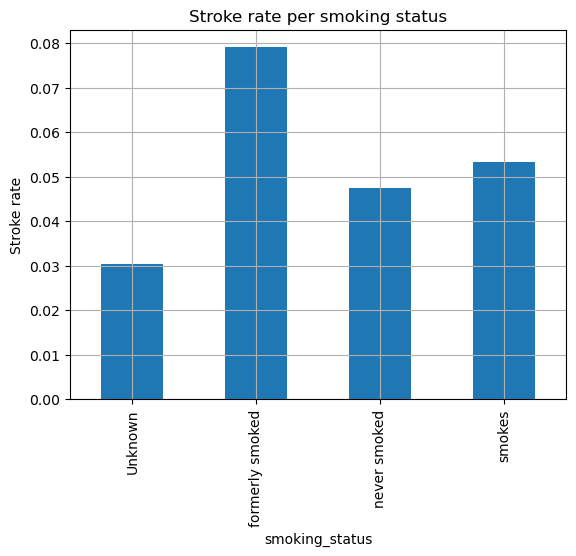

In [31]:
# aggregate smoking status with stroke
df.groupby("smoking_status").aggregate({"stroke": "mean"}).plot(kind = 'bar', legend = None)
# label the axis and title
plt.ylabel('Stroke rate')
plt.title('Stroke rate per smoking status')
plt.grid()

In [32]:
# calculating the general correlation
correlation = df.select_dtypes('number').corr()
correlation

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


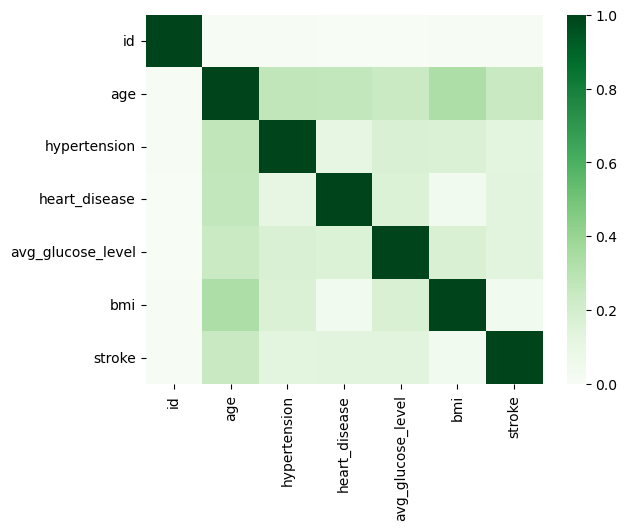

In [33]:
# visualizing the general correlation
sns.heatmap(correlation, cmap="Greens");

In [34]:
# Take another glance at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [35]:
# looking at the categorical features
df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']].head(10)

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
6,Male,Yes,Private,Rural,never smoked
7,Female,No,Private,Urban,never smoked
8,Female,Yes,Private,Rural,Unknown
9,Female,Yes,Private,Urban,Unknown


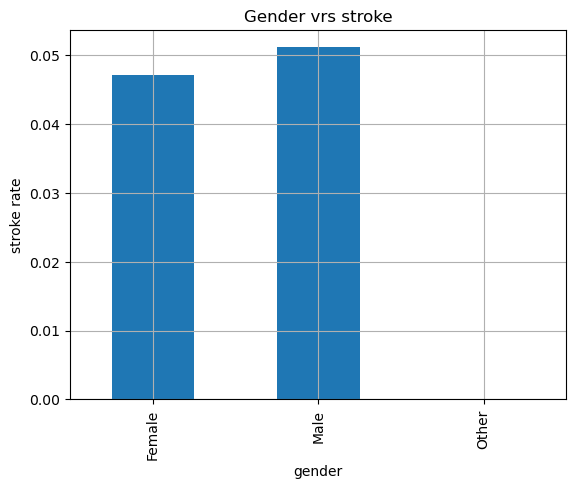

In [36]:
# gender vrs stroke
df.groupby("gender").aggregate({"stroke": "mean"}).plot(kind = 'bar', legend = None)

# label the axis and title
plt.ylabel('stroke rate')
plt.title('Gender vrs stroke')

plt.grid()

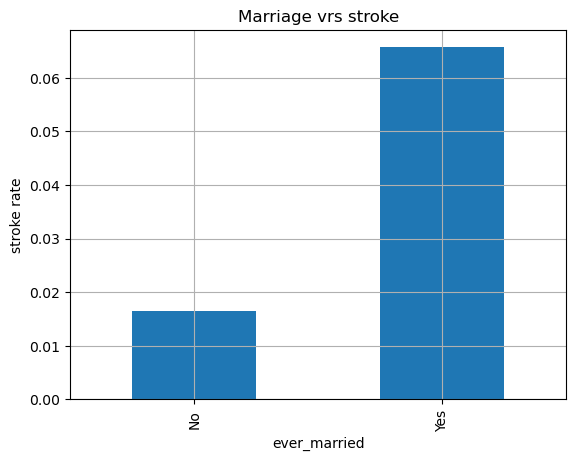

In [37]:
# marriage vrs stroke
df.groupby("ever_married").aggregate({"stroke": "mean"}).plot(kind = 'bar', legend = None)

# label the axis and title
plt.ylabel('stroke rate')
plt.title('Marriage vrs stroke')

plt.grid()

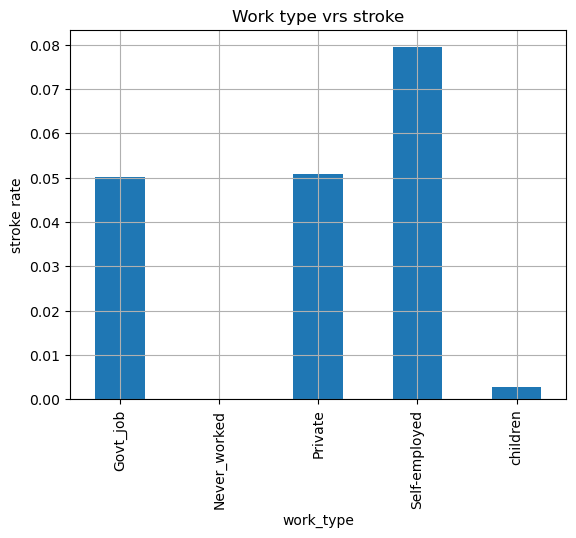

In [38]:
# work type vrs stroke
df.groupby("work_type").aggregate({"stroke": "mean"}).plot(kind = 'bar', legend = None)

# label the axis and title
plt.ylabel('stroke rate')
plt.title('Work type vrs stroke')

plt.grid()

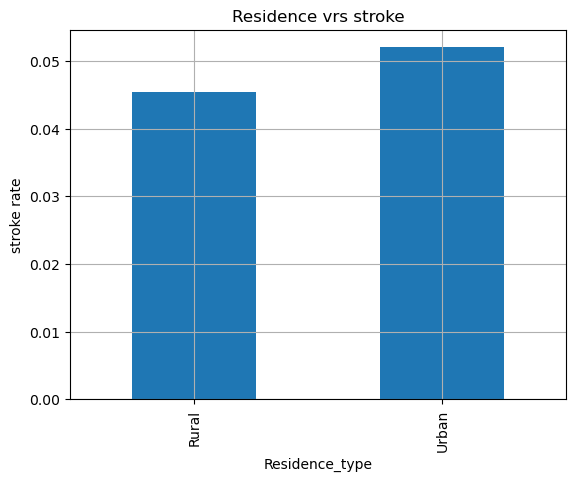

In [39]:
# Residence type vrs stroke
df.groupby("Residence_type").aggregate({"stroke": "mean"}).plot(kind = 'bar', legend = None)

# label the axis and title
plt.ylabel('stroke rate')
plt.title('Residence vrs stroke')

plt.grid()

In [40]:
# make gender categorical
df['gender'] = pd.Categorical(df['gender'], categories=['Male', 'Female', 'Others'])

# Convert the categorical values to numerical codes
df['numGender'] = df['gender'].cat.codes + 1

# compare the two columns
df[["gender", "numGender"]].head(20)

,gender,numGender
0,Male,1
1,Female,2
2,Male,1
3,Female,2
4,Female,2
5,Male,1
6,Male,1
7,Female,2
8,Female,2
9,Female,2


In [41]:
# Convert the categorical values to numerical codes
df['numEver_married'] = df['ever_married'].apply(lambda x: 1 if x == 'Yes' else 0)

# compare the two columns
df[['ever_married','numEver_married']].head(10)

,ever_married,numEver_married
0,Yes,1
1,Yes,1
2,Yes,1
3,Yes,1
4,Yes,1
5,Yes,1
6,Yes,1
7,No,0
8,Yes,1
9,Yes,1


In [42]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [43]:
# encode residence type with 1 --- Rural and 2 --- Urban and assign it to a new column
df['numResidence_type'] = df['Residence_type'].apply(lambda x: 1 if x == "Rural" else 2)

# compare the two columns for validation
df[['numResidence_type', 'Residence_type']].head()

,numResidence_type,Residence_type
0,2,Urban
1,1,Rural
2,1,Rural
3,2,Urban
4,1,Rural


In [44]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [45]:
# make work type categorical
df['work_type'] = pd.Categorical(df['work_type'], categories=['Private', 'Self-employed', 'children', 'Govt_job',
                                                             'Never_worked'])

# Convert the categorical values to numerical codes
df['numWork_type'] = df['work_type'].cat.codes + 1

# compare the two columns
df[["work_type", "numWork_type"]].head(15)

,work_type,numWork_type
0,Private,1
1,Self-employed,2
2,Private,1
3,Private,1
4,Self-employed,2
5,Private,1
6,Private,1
7,Private,1
8,Private,1
9,Private,1


In [46]:
# make smoking status categorical
df['smoking_status'] = pd.Categorical(df['smoking_status'], categories=['never smoked', 'Unknown', 'formerly smoked',
                                                             'smokes'])

# Convert the categorical values to numerical codes
df['numSmoking_status'] = df['smoking_status'].cat.codes + 1

# compare the two columns
df[["smoking_status", "numSmoking_status"]].head(15)

,smoking_status,numSmoking_status
0,formerly smoked,3
1,never smoked,1
2,never smoked,1
3,smokes,4
4,never smoked,1
5,formerly smoked,3
6,never smoked,1
7,never smoked,1
8,Unknown,2
9,Unknown,2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5109 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
 12  numGender          5110 non-null   int8    
 13  numEver_married    5110 non-null   int64   
 14  numResidence_type  5110 non-null   int64   
 15  numWork_type       5110 non-null   int8    
 16  numSmo

In [79]:
# split the data into X -- for the features and y -- for the response variable. 
X = df.drop(columns=["id", "stroke", "gender", "Residence_type", "ever_married", "work_type", "smoking_status"])
y = df["stroke"]

print("X shape:", X.shape, "\ny shape:", y.shape)

X shape: (5110, 10) 
y shape: (5110,)


In [82]:
# import library
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# create a pipeline for the necessary processes
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('f-test', SelectKBest(score_func=f_classif)),
])

# fit the pipeline with the data
pipeline.fit(X, y)

# You can choose not to state the strategy since the default value is 'mean' unless using otherwise.

Pipeline(steps=[('imputer', SimpleImputer()), ('f-test', SelectKBest())])

In [50]:
import numpy as np

# Get the F-test scores and p-values
f_test_scores = pipeline.named_steps['f-test'].scores_
p_values = pipeline.named_steps['f-test'].pvalues_

# Create a DataFrame to show the scores and p-values
scores_df = pd.DataFrame({
    'Feature': X.columns,
    'F-test score': f_test_scores,
    'p-value': p_values
})

# Sort the DataFrame by p-value in ascending order
scores_df = scores_df.sort_values(by='p-value', ascending=True)

# Print the DataFrame
scores_df


,Feature,F-test score,p-value
0,age,326.916568,7.030778e-71
2,heart_disease,94.698406,3.451927e-22
3,avg_glucose_level,90.503870,2.767811e-21
1,hypertension,84.953542,4.367557e-20
6,numEver_married,60.667230,8.128659e-15
4,bmi,7.759776,5.361957e-03
8,numWork_type,5.268093,2.176013e-02
9,numSmoking_status,4.813113,2.828887e-02
7,numResidence_type,1.220842,2.692476e-01
5,numGender,0.407266,5.233891e-01


In [88]:
# preparing the data 
X = X.drop(columns=["numGender", "numResidence_type"])

# print the shapes
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (5110, 8) 
y shape: (5110,)


In [89]:
# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4599, 8)
y_train shape: (4599,)
X_test shape: (511, 8)
y_test shape: (511,)


In [90]:
LogisticRegression?

In [95]:
m = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('logisticregression', LogisticRegression(solver='liblinear', penalty = 'l1', C = 20))
])

m.fit(X_train, y_train)

cross_val_score(m, X_train, y_train, cv = 10)

array([0.95217391, 0.95217391, 0.95217391, 0.95217391, 0.95217391,
       0.95217391, 0.95217391, 0.95217391, 0.95      , 0.95206972])

In [100]:
# import model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# build the model
model_lr = Pipeline([
    ('imputer', SimpleImputer()),
    ('logisticregression', LogisticRegression(solver='liblinear', penalty = 'l1', C = 20))
])


# train the model
model_lr.fit(X_train, y_train)

# perform 5-fold cross-validation
scores = cross_val_score(model_lr, X_train, y_train, cv=5)

# print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.95108696 0.95217391 0.95217391 0.95108696 0.95212187]
Mean cross-validation score:  0.951728722146


In [97]:
df['stroke'].value_counts(normalize= True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [101]:
# make predictions
y_pred = model_lr.predict(X_train)

# calculate the training score
training_acc = model_lr.score(X_train, y_train)
print(f'The training accuracy is {training_acc}')

The training accuracy is 0.9521635138073494


In [102]:
# perform 5-fold cross-validation
scores = cross_val_score(model_lr, X_test, y_test, cv=10)

# print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.94230769 0.96078431 0.94117647 0.94117647 0.94117647 0.94117647
 0.94117647 0.94117647 0.94117647 0.94117647]
Mean cross-validation score:  0.9432503770739065


In [105]:
# make predictions
pred = model_lr.predict(X_test)

# calculate the test accuracy
test_acc = model_lr.score(X_test, y_test)
print(f'The test accuracy is {test_acc.round(4)}')

The test accuracy is 0.9452


In [106]:
# make predictions
pred = model_lr.predict(X_train)

# calculate the test accuracy
test_acc = model_lr.score(X_train, y_train)
print(f'The train accuracy is {test_acc.round(4)}')

The train accuracy is 0.9522


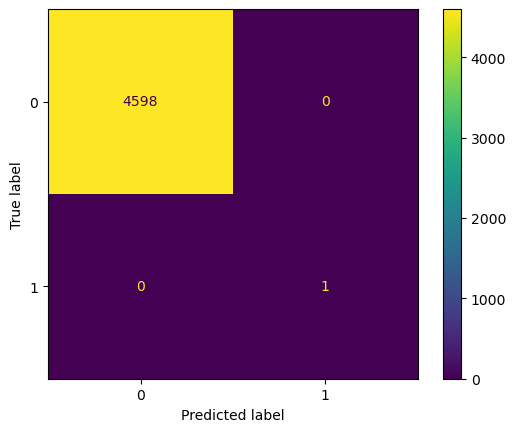

In [107]:
ConfusionMatrixDisplay.from_estimator(model_lr, X_train, pred);

In [108]:
X = df.drop(columns=['id', 'stroke', 'numGender', 'numEver_married', 'numResidence_type', 
                     'numWork_type', 'numSmoking_status'])
y = df['stroke']

print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (5110, 10) 
y shape: (5110,)


In [109]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [110]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4599, 10)
y_train shape: (4599,)
X_test shape: (511, 10)
y_test shape: (511,)


In [111]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
346,Male,68.00,0,0,Yes,Private,Rural,116.23,26.1,never smoked
4296,Female,64.00,0,0,Yes,Private,Rural,75.13,31.1,formerly smoked
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown
457,Female,33.00,1,0,Yes,Private,Urban,74.44,45.2,smokes
2801,Male,0.80,0,0,No,children,Urban,75.22,33.1,Unknown


In [118]:
df['stroke'].value_counts(normalize =True).max()

0.9512720156555773

In [59]:
# Calculating the baseline accuracy
acc_baseline = df['stroke'].value_counts(normalize = True).max()
print('The baseline accuracy is ', round(acc_baseline * 100, 4), '%')

The baseline accuracy is  95.1272 %


In [119]:
make_pipeline(
    SimpleImputer(),
    OrdinalEncoder(),
    RandomForestClassifier(random_state= 42)
)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('ordinalencoder', OrdinalEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [60]:
# Building a pipeline for the model
clf = make_pipeline(
    SimpleImputer(),
    OrdinalEncoder(),
    RandomForestClassifier(random_state=42)
)
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('ordinalencoder', OrdinalEncoder()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


#### Using GridSearchCv to get the best hyperparameter for the model

In [120]:
# Creating a dictionary with range of hyperparameters for hyperparameter tunning
params = {
    "simpleimputer__strategy": ["most_frequent"],
    "ordinalencoder__handle_unknown": ["use_encoded_value"],
    "ordinalencoder__unknown_value": [30000],
    "randomforestclassifier__max_depth": range(10, 50, 10),
    "randomforestclassifier__n_estimators": range(25, 100, 25)
}
params

{'simpleimputer__strategy': ['most_frequent'],
 'ordinalencoder__handle_unknown': ['use_encoded_value'],
 'ordinalencoder__unknown_value': [30000],
 'randomforestclassifier__max_depth': range(10, 50, 10),
 'randomforestclassifier__n_estimators': range(25, 100, 25)}

In [121]:
# Creating GridSearchCv to get the best hyperparameters for the model
model = GridSearchCV(
    clf,
    param_grid = params,
    cv = 5,
    n_jobs = -1, 
    verbose = 1
)
model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ordinalencoder__handle_unknown': ['use_encoded_value'],
                         'ordinalencoder__unknown_value': [30000],
                         'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['most_frequent']},
             verbose=1)

#### Fitting the model with the training data

In [122]:
# Training the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('ordinalencoder', OrdinalEncoder()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'ordinalencoder__handle_unknown': ['use_encoded_value'],
                         'ordinalencoder__unknown_value': [30000],
                         'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['most_frequent']},
             verbose=1)

In [124]:
# calculate the training accuracy
training_acc = model.score(X_train, y_train)
print(f"Training accuracy: {round(training_acc* 100, 4) }%")

Training accuracy: 96.8689%


It can clearly be seen that this model is training well since the training score `97.3092%` is higher than the baseline score `95.1272%`. This is a good sign.

In [125]:
# predict the training data 
pred = model.predict(X_train)
pred[:20]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [126]:
# predict the test data
y_pred = model.predict(X_test)
y_pred[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
# calculate the testing accuracy
test_acc = model.score(X_test, y_pred)
print(f"Test accuracy: {test_acc * 100}%")

Test accuracy: 100.0%


`This is great!!!` <br>
We have a `100%` test accuracy which is so amazing. But let's do further analysis to see how the model does predictions.

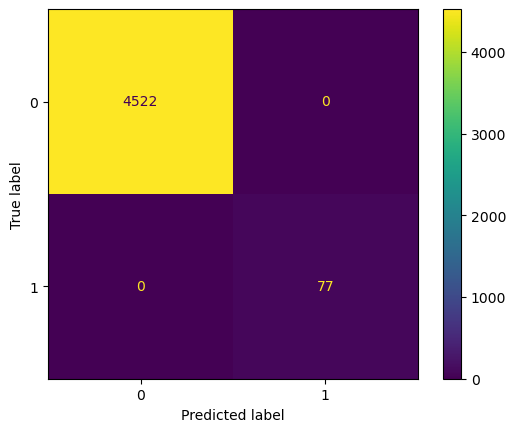

In [128]:
# create a confusion matrix to analyze the model performance on the training data
ConfusionMatrixDisplay.from_estimator(model, X_train, pred);

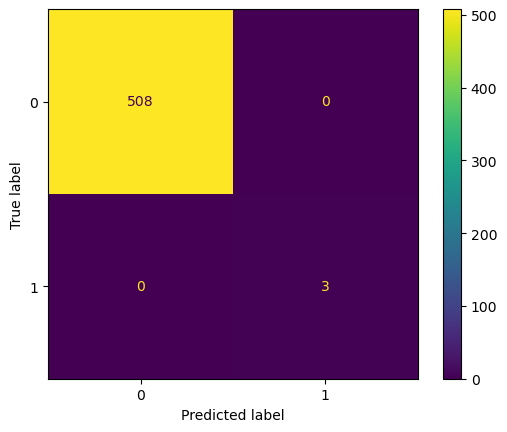

In [129]:
# create a confusion matrix to analyze the model performance on the test data
ConfusionMatrixDisplay.from_estimator(model, X_test, y_pred);

In [70]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [134]:
model.predict_proba(X_test)[:,1]

array([1.33333333e-02, 9.14805093e-03, 2.66666667e-02, 3.26845379e-01,
       7.99551889e-02, 2.99563012e-01, 4.14772040e-02, 1.36277211e-01,
       1.33333333e-02, 1.33333333e-02, 6.97501584e-03, 1.06783512e-03,
       1.27864093e-01, 4.93889483e-02, 4.08359471e-01, 5.67708333e-02,
       1.50378630e-02, 2.66666667e-02, 7.04025770e-04, 1.33333333e-02,
       6.92986495e-02, 6.94105531e-02, 4.21940928e-05, 2.73308913e-02,
       1.33333333e-02, 8.58758962e-02, 2.66666667e-02, 4.78355234e-02,
       2.72825229e-01, 9.02698297e-04, 1.56036894e-01, 5.78399378e-03,
       9.30440129e-02, 1.36252186e-02, 1.36228182e-04, 1.55092593e-01,
       3.07953511e-01, 4.00000000e-02, 1.86054927e-01, 1.07986197e-01,
       1.21910101e-01, 3.04032819e-02, 2.66666667e-02, 1.77993611e-01,
       4.96613849e-02, 2.46990152e-02, 4.21940928e-05, 1.76089927e-01,
       2.66666667e-02, 1.41802140e-02, 5.71428571e-02, 2.66666667e-02,
       3.07671795e-01, 1.06783512e-03, 9.19876566e-02, 9.07662596e-02,
      

In [136]:
import gradio as gr

# create a function to predict stroke
def predicta(gender, age, hypertension, heart_disease, marriage_status, work_type, Residence_type, average_glucose_level, BMI, smoking_status):
    
    # create a dataframe with the inputs
    df = pd.DataFrame({
        'gender': [gender], 
        'age':[age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'ever_married': [marriage_status],
        'work_type': [work_type],
        'Residence_type': [Residence_type],
        'avg_glucose_level': [average_glucose_level],
        'bmi': [BMI], 
        'smoking_status': [smoking_status]
    })
    
    # make prediction
    y_pred = round(model.predict_proba(df)[:,1], 2)
    
    # return the stroke probability
    return y_pred

# give the function an interface
app = gr.Interface(
    title= "Stroke Prediction App",
    fn=predicta,
    inputs=["text","number", "number", "number", "text", "text", "text", "number", "number", "text"],
    outputs=["number"]
)
app.launch()

Running on local URL:  http://127.0.0.1:7866

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/routes.py", line 393, in run_predict
    output = await app.get_blocks().process_api(
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 1059, in process_api
    result = await self.call_function(
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 868, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/anyio/to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 818, in run_sync_in_worker_thread
    return await future
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/anyio/_backends/_asyncio.py", line 754, in run
    result = context.run(func, *args)
  Fil

In [73]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,numGender,numEver_married,numResidence_type,numWork_type,numSmoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,2,1,3
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,2,1,1,2,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,1,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,2,1,2,1,4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,2,1,1,2,1


Traceback (most recent call last):
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/routes.py", line 393, in run_predict
    output = await app.get_blocks().process_api(
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 1062, in process_api
    data = self.postprocess_data(fn_index, result["prediction"], state)
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/blocks.py", line 996, in postprocess_data
    prediction_value = block.postprocess(prediction_value)
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/components.py", line 568, in postprocess
    return self._round_to_precision(y, self.precision)
  File "/home/mmutakilu/anaconda3/lib/python3.9/site-packages/gradio/components.py", line 517, in _round_to_precision
    return float(num)
TypeError: only size-1 arrays can be converted to Python scalars
